In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [60]:
data = pd.read_csv('bank-full.csv')

In [ ]:
data.head()

In [62]:
X = data.drop('y', axis=1)
y = data['y']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [66]:
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

In [69]:
# Creating numeric transformer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [70]:
# Creating categoric transformer

categorical_transformer = Pipeline(steps=[
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))
])

In [74]:
# Combining transformers

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [75]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

In [76]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('oneshot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [84]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_confusion_matrix, plot_roc

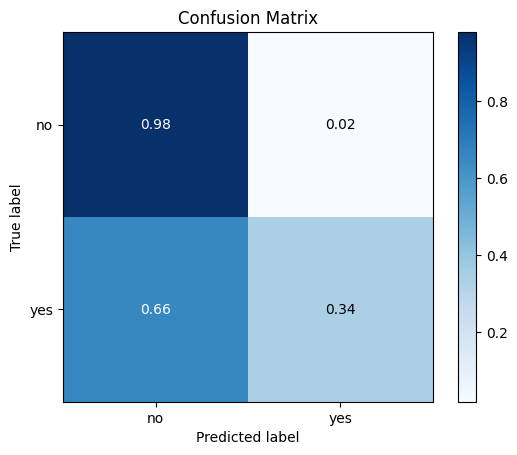

In [85]:
plot_confusion_matrix(y_test, y_pred, normalize = 'True')
plt.title('Confusion Matrix')
plt.show()